# Pruebas Adaboost + RandomForest

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-38:
- Estimadores de los RandomForest aumentados de 10 a 16

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
RANDOM_SEED = 12

In [3]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [4]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000, random_state=RANDOM_SEED)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [5]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [6]:
TEST_SIZE_PERCENT = 0.1

In [7]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [8]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [9]:
clasificador = AdaBoostClassifier(
    base_estimator = RandomForestClassifier(
        n_estimators=16, 
        criterion='entropy', 
        max_features='sqrt', 
        min_samples_split=100, 
        n_jobs=-1, 
        random_state=RANDOM_SEED, 
        verbose=10
    ),
    n_estimators=15,
    random_state=RANDOM_SEED
)

In [10]:
clasificador.fit(X_train, y_train)

building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.1s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   18.0s remaining:    8.2s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   22.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   24.5s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.9s finished


building tree 1 of 16building tree 2 of 16

building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.3s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   21.8s remaining:    9.9s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   28.7s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   29.5s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.0s finished


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.8s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   28.4s remaining:   12.9s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   32.7s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   39.0s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.1s finished


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.2s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   35.7s remaining:   16.2s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   45.7s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   47.7s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16building tree 3 of 16

building tree 4 of 16

building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.0s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   37.6s remaining:   17.1s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   45.8s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   50.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.6s finished


building tree 1 of 16building tree 2 of 16

building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.1s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   35.3s remaining:   16.0s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   44.4s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   46.5s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16
building tree 3 of 16

building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.3s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   33.4s remaining:   15.2s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   44.4s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   45.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.7s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   34.1s remaining:   15.5s


building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   44.2s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   45.6s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16

building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.0s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   34.8s remaining:   15.8s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   45.0s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   46.5s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.6s finished


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.4s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   33.6s remaining:   15.3s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   43.1s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   44.6s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16building tree 4 of 16

building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.0s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   33.4s remaining:   15.2s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   42.1s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   45.5s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16

building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.3s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   32.9s remaining:   15.0s


building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   43.4s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   46.8s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16building tree 3 of 16


building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.1s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   33.4s remaining:   15.2s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   42.0s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   44.4s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16building tree 3 of 16

building tree 4 of 16

building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.8s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   34.2s remaining:   15.6s


building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   45.1s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   45.6s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


building tree 1 of 16building tree 2 of 16building tree 3 of 16building tree 4 of 16



building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.7s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   31.9s remaining:   14.5s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   40.3s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   43.2s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=-1,
            oob_score=False, random_state=12, verbose=10, warm_start=False),
          learning_rate=1.0, n_estimators=15, random_state=12)

In [17]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remai

In [18]:
roc_auc_score(y_test, y_test_predictd)

0.992375345506603

In [19]:
clasificador.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remai

0.96813

In [20]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.1s remai

In [21]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

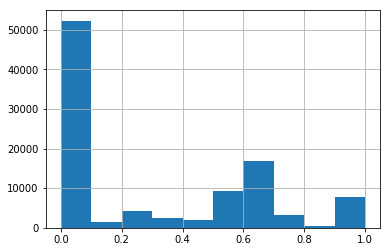

In [22]:
kaggle_out['sepostulo'].hist()

In [23]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-40.csv', index=False)

In [24]:
kaggle_37 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-37.csv')
kaggle_38 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-38.csv')

In [25]:
print('ROCAUC 37 vs 38:', roc_auc_score(np.round(kaggle_37['sepostulo']), kaggle_38['sepostulo']))
print('ROCAUC 37 vs 40:', roc_auc_score(np.round(kaggle_37['sepostulo']), kaggle_out['sepostulo']))
print('ROCAUC 38 vs 40:', roc_auc_score(np.round(kaggle_38['sepostulo']), kaggle_out['sepostulo']))

ROCAUC 37 vs 38: 0.9957863005835678
ROCAUC 37 vs 40: 0.9967739487850068
ROCAUC 38 vs 40: 0.9981499594111478


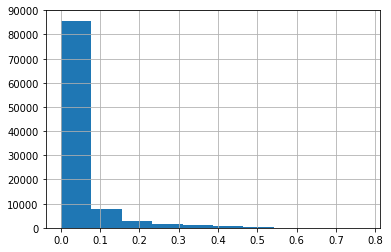

In [26]:
np.abs(kaggle_37['sepostulo'] - kaggle_out['sepostulo']).hist()

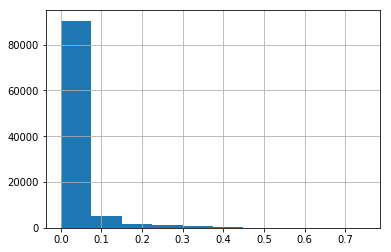

In [27]:
np.abs(kaggle_38['sepostulo'] - kaggle_out['sepostulo']).hist()

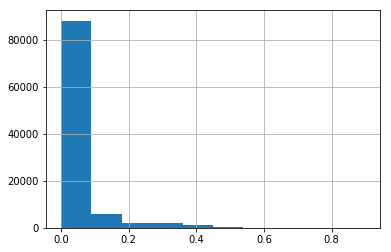

In [28]:
np.abs(kaggle_37['sepostulo'] - kaggle_38['sepostulo']).hist()

In [ ]:
# kaggle score: 0.93479